In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from LogisticRegression import LogisticRegression  # 使用自定义的 LogisticRegression 类
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

In [2]:
# 加载数据集
iris = datasets.load_iris()

# 选择特征和类别
feature_indices = [2, 3]
class_indices = [0, 1]

X = iris.data[:, feature_indices]
y = iris.target

# 筛选所需类别的数据
X = X[np.isin(y, class_indices)]
y = y[np.isin(y, class_indices)]
y = np.where(y == class_indices[0], 0, 1)  # 将类别转换为二分类的标签 0 和 1

# 标准化处理
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [3]:
# 使用自定义 LogisticRegression 类进行训练
model = LogisticRegression(model_type='binary', learning_rate=0.1, iterations=1000, lambda_=0.01, batch_size=32)
model.fit(X_standardized, y)

Training Binary Logistic Regression: 100%|██████████| 1000/1000 [00:00<00:00, 11064.43it/s]


LogisticRegression(learning_rate=0.1)

In [4]:
# 预测和评估
y_pred = model.predict(X_standardized)
acc = np.mean(y == y_pred)
print(f"Classification accuracy: {acc * 100:.2f}%")

Classification accuracy: 100.00%


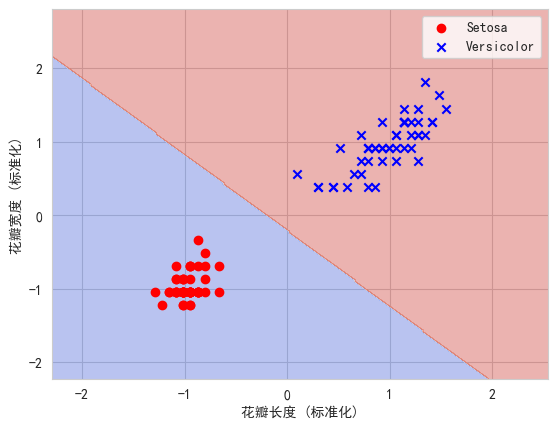

In [5]:
# 创建标准化后的网格点
x_min, x_max = X_standardized[:, 0].min() - 1, X_standardized[:, 0].max() + 1
y_min, y_max = X_standardized[:, 1].min() - 1, X_standardized[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# 预测标准化网格点的类别
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 绘制等高线图和散点图
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
plt.scatter(X_standardized[y==0, 0], X_standardized[y==0, 1], color='red', marker='o', label='Setosa')
plt.scatter(X_standardized[y==1, 0], X_standardized[y==1, 1], color='blue', marker='x', label='Versicolor')
plt.xlabel('花瓣长度 (标准化)')
plt.ylabel('花瓣宽度 (标准化)')
plt.legend()
plt.show()